# Generating 3d printable .stl files with Matplotlib

There are many great modelling tools out there that allow you to generate and export stl files for 3d printing (my favourites are OpenScad and Fusion 360) - but sometimes, particularly if you want to print a mathematical surface, 

   - The standard format for 3d printing is (currently) .stl files. These files represent the surface of the object to be printed as a series of triangular faces. To be printable, the surface enclosed by these faces must not contain holes (if you imagined filling it with water there should no points for the water to leak out). 
   
   - Matplotlib includes functionality for creating and plotting triangulations for 3d plots, https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html, however, unlike for 3d printing, plots produced for visualization are generally not water-tight solids. In this notebook I show how you can create meshes that are printable.

   - Finally, the numpy-stl library makes it straighforward to write a save a triangulated mesh from python to a .stl file on disk.


In [13]:
import numpy as np
import matplotlib
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gen_stl import *
print ("matplotlib",matplotlib.__version__)
print ("numpy",np.version.version)
%matplotlib inline

matplotlib 2.0.2
numpy 1.13.1


### Creating a tringular mesh
Matplotlib can create a triangular mesh from an a set of x,y points on the plane via Delaunay triangulation https://en.wikipedia.org/wiki/Delaunay_triangulation.

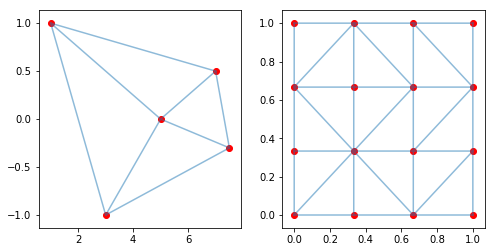

In [33]:
# Create a triangular mesh over arbitrary x,y points.
# Note that the points ca be passed in any order.  
x = np.array([1,3,7,5,7.5])
y = np.array([1,-1,.5,0,-.3])
tri1 = mtri.Triangulation(x,y)
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].triplot(tri1,alpha=0.5)
ax[0].scatter(x,y,color="red")

# create a triangular mesh of a rectangular grid of points.
x,y = np.meshgrid(np.linspace(0,1,4),np.linspace(0,1,4))
x,y = x.ravel(),y.ravel()
tri2 = mtri.Triangulation(x,y)
ax[1].triplot(tri2,alpha=0.5)
ax[1].scatter(x,y,color="red")


The returned triangulation object contains three key attributes, 
   - x: the x positions of the verticies
   - y: the y positions of the verticies
   - triangles: An array of shape (n,3) where n is the number of triangles.Each row specifies a triangle by the indicies of its verticies. 

It also contains information on the edges and neighbours in the triangulation - see https://matplotlib.org/api/tri_api.html

In [47]:
print ("x-coordinates:",tri1.x)
print ("y-coordinates:",tri1.y)
print ("triangles:\n",tri1.triangles)

x-coordinates: [ 1.   3.   7.   5.   7.5]
y-coordinates: [ 1.  -1.   0.5  0.  -0.3]
triangles:
 [[0 1 3]
 [3 1 4]
 [0 3 2]
 [2 3 4]]


### Adding the 3rd dimension

### Making things water-tight

### Exporting to .stl

### Examples

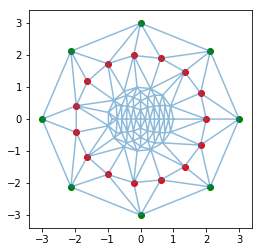

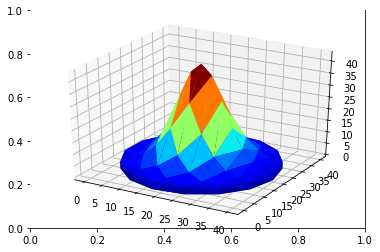

In [2]:
from scipy.stats import multivariate_normal

grid = CircleGrid(div_r = 8, div_theta=15)
grid.plot_mesh()

mu, cov =np.array([0,0]),np.array([[.1,0],[0,.1]])
dist = multivariate_normal(mu,cov)
tri = grid.surface(dist.pdf)
plot_surface(tri)
write_stl(tri,"normal.stl")

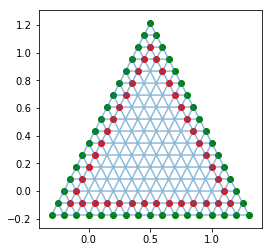

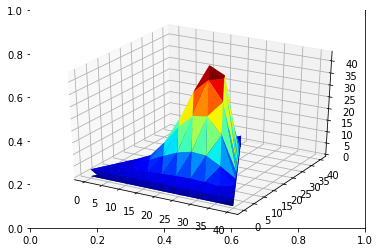

In [3]:
from scipy.stats import dirichlet
grid = BarycentricTriangleGrid(subdiv=4)
grid.plot_mesh()

dist = dirichlet(alpha=[2,3,4])
tri = grid.surface(dist.pdf)
plot_surface(tri)
write_stl(tri,"dirichlet.stl")